In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2]:
df = pd.read_csv('volvo_sales_data.csv')
df.head()

,Year,Month,Models,December 2023,December 2022,%,Year To Date 2023,Year To Date 2022,%.1
0,2018,1,S60 II,"1,370","1,333",2.8 %,"1,370","1,333",2.8 %
1,2018,1,S60L,"2,710","2,104",28.8 %,"2,710","2,104",28.8 %
2,2018,1,S60 CC,108,85,27.1 %,108,85,27.1 %
3,2018,1,S80 II,0,3,-,-,3,-
4,2018,1,S90,"6,057","1,843",228.6 %,"6,057","1,843",228.6 %


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1126 non-null   int64 
 1   Month              1126 non-null   int64 
 2   Models             1126 non-null   object
 3   December 2023      1126 non-null   object
 4   December 2022      1126 non-null   object
 5   %                  1126 non-null   object
 6   Year To Date 2023  1126 non-null   object
 7   Year To Date 2022  1126 non-null   object
 8   %.1                1126 non-null   object
dtypes: int64(2), object(7)
memory usage: 79.3+ KB


In [4]:
df = df.drop(columns=df.columns[-5:], axis=1)  
df.head()

,Year,Month,Models,December 2023
0,2018,1,S60 II,"1,370"
1,2018,1,S60L,"2,710"
2,2018,1,S60 CC,108
3,2018,1,S80 II,0
4,2018,1,S90,"6,057"


In [5]:
df.rename(columns={'December 2023': 'Sales'}, inplace=True)
df.head()

,Year,Month,Models,Sales
0,2018,1,S60 II,"1,370"
1,2018,1,S60L,"2,710"
2,2018,1,S60 CC,108
3,2018,1,S80 II,0
4,2018,1,S90,"6,057"


In [6]:
df.replace('-', '0', inplace=True)

df['Sales'] = df['Sales'].str.replace(',', '')
df['Sales'] = pd.to_numeric(df['Sales'])
df.head()

,Year,Month,Models,Sales
0,2018,1,S60 II,1370
1,2018,1,S60L,2710
2,2018,1,S60 CC,108
3,2018,1,S80 II,0
4,2018,1,S90,6057


In [7]:
# Ensure the 'Year' and 'Month' columns are in datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    1126 non-null   int64         
 1   Month   1126 non-null   int64         
 2   Models  1126 non-null   object        
 3   Sales   1126 non-null   int64         
 4   Date    1126 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 44.1+ KB


c:\Users\abuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


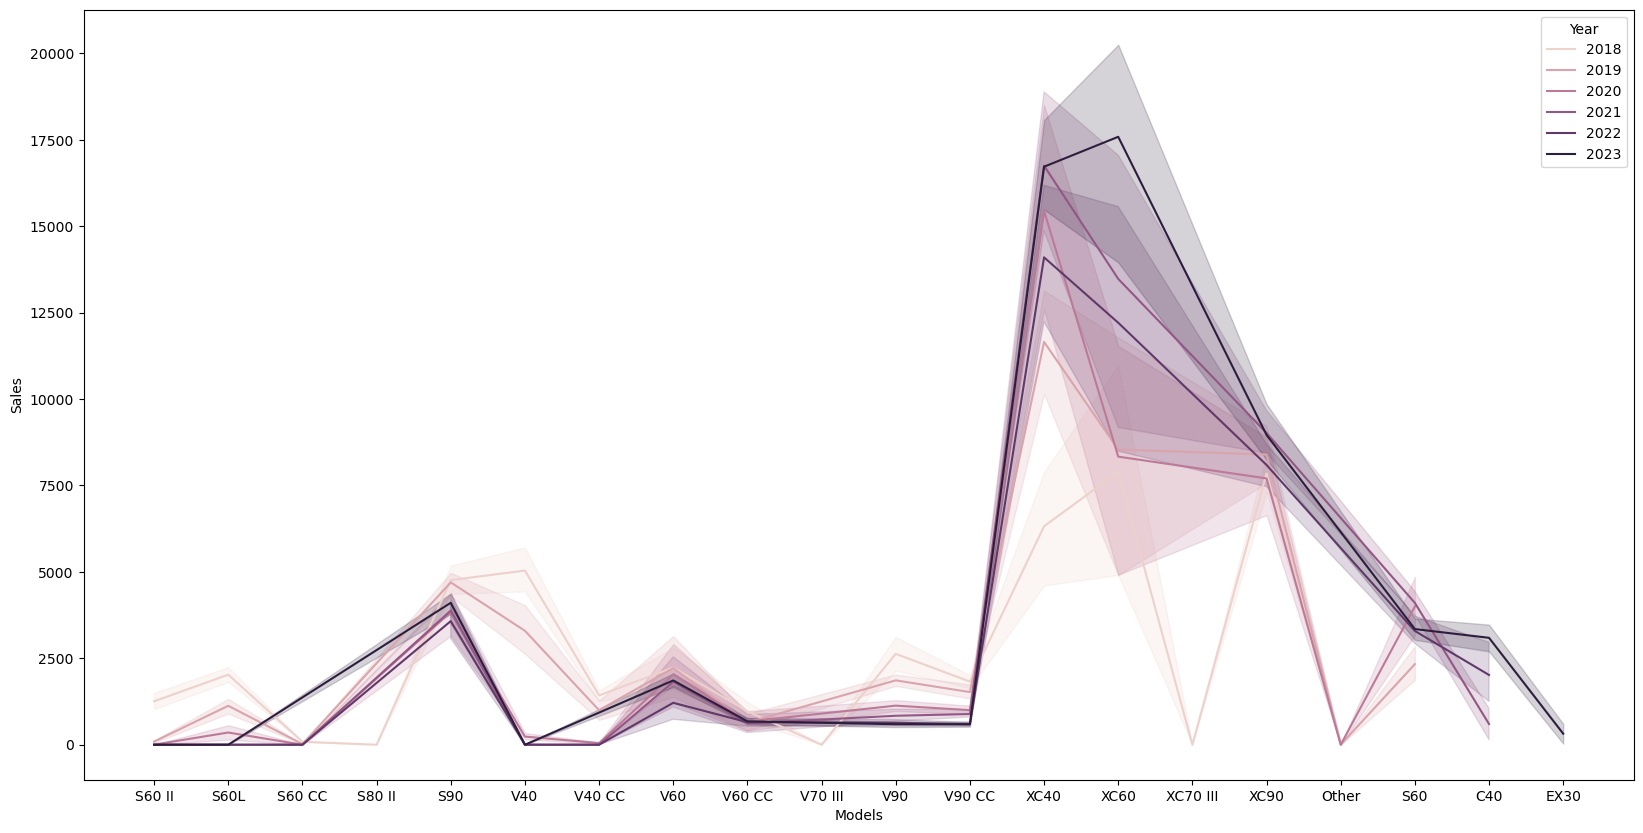

In [8]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=df, x='Models', y='Sales', hue='Year', ax=ax)
plt.show()

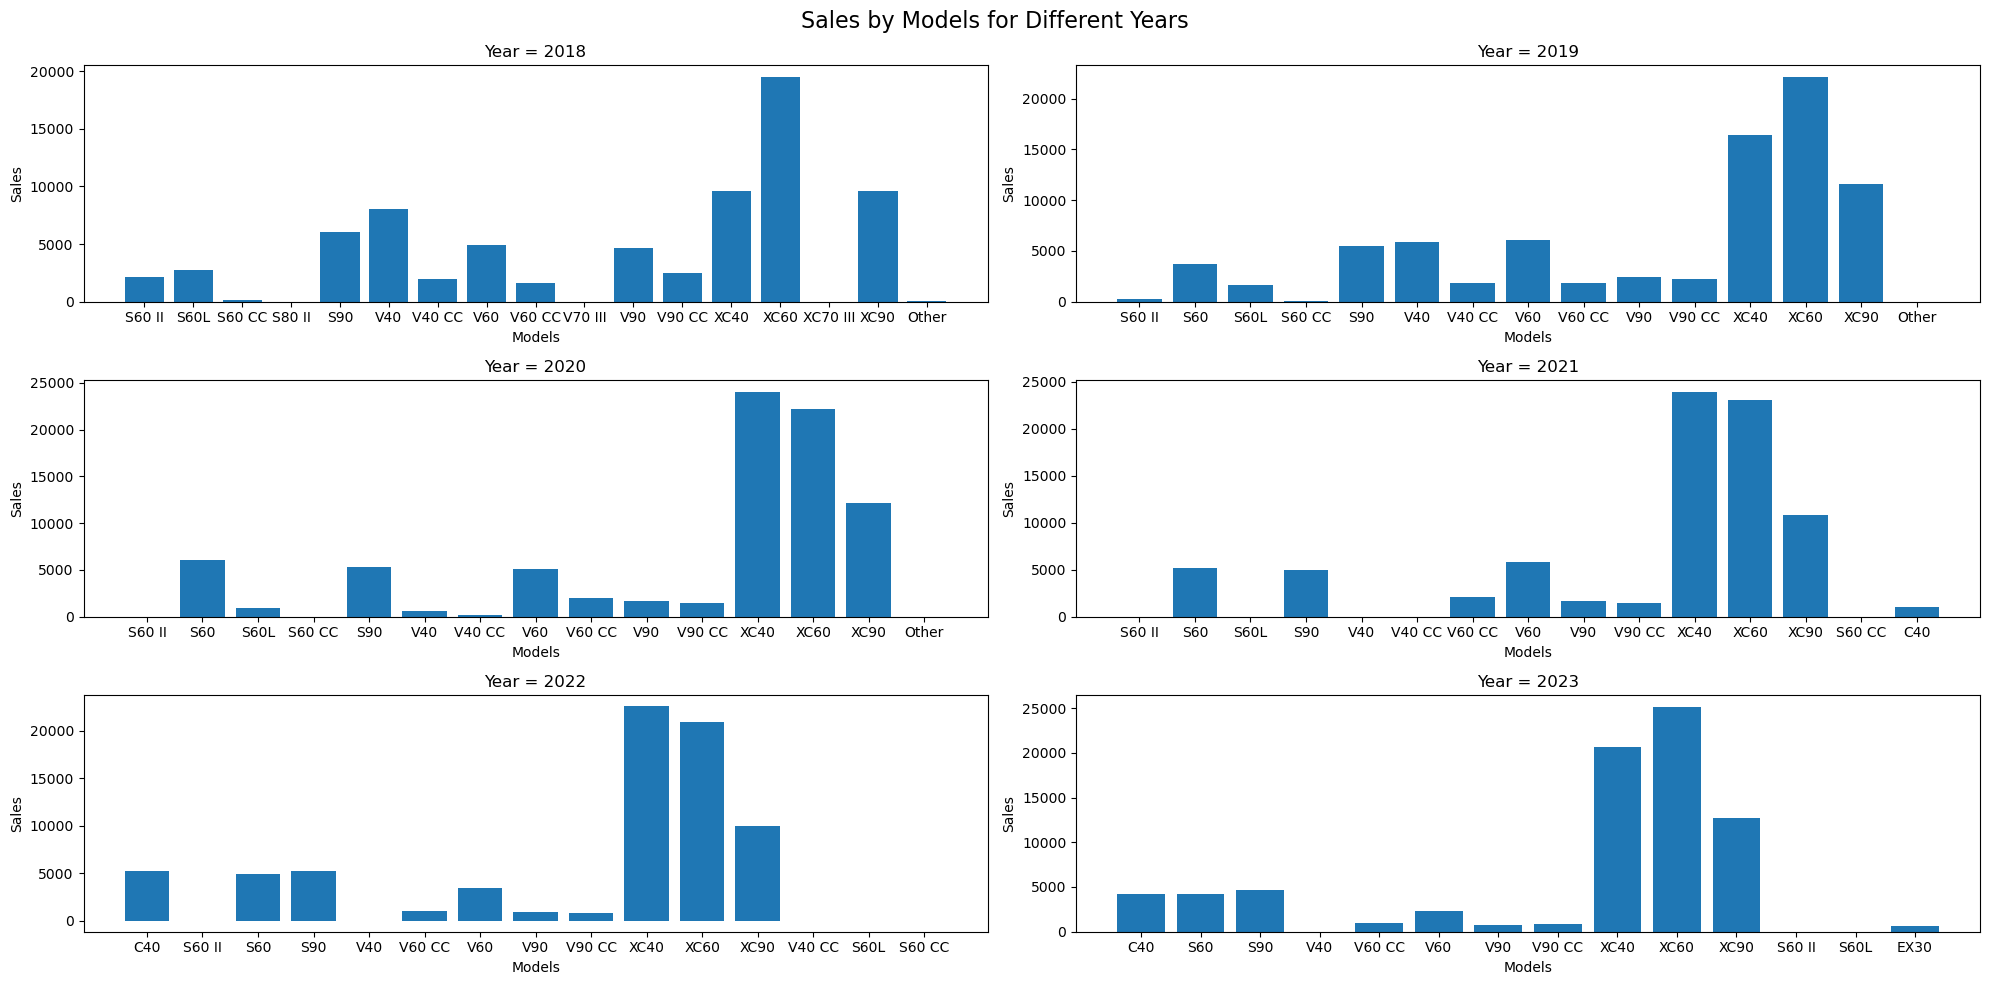

In [9]:
years = df['Year'].unique()

# Create subplots
fig, axs = plt.subplots(nrows=(len(years) + 1) // 2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Plot each year's data in a subplot
for i, year in enumerate(years):
    ax = axs[i]
    year_data = df[df['Year'] == year]
    ax.bar(year_data['Models'], year_data['Sales'])
    ax.set_title(f'Year = {year}')
    ax.set_xlabel('Models')
    ax.set_ylabel('Sales')

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Sales by Models for Different Years', fontsize=16)
plt.show()

In [10]:
monthly_avg = df.groupby(['Year', 'Month'])['Sales'].mean().reset_index()
monthly_avg.head()

,Year,Month,Sales
0,2018,1,2555.235294
1,2018,2,2407.588235
2,2018,3,3708.235294
3,2018,4,3096.176471
4,2018,5,2974.388889


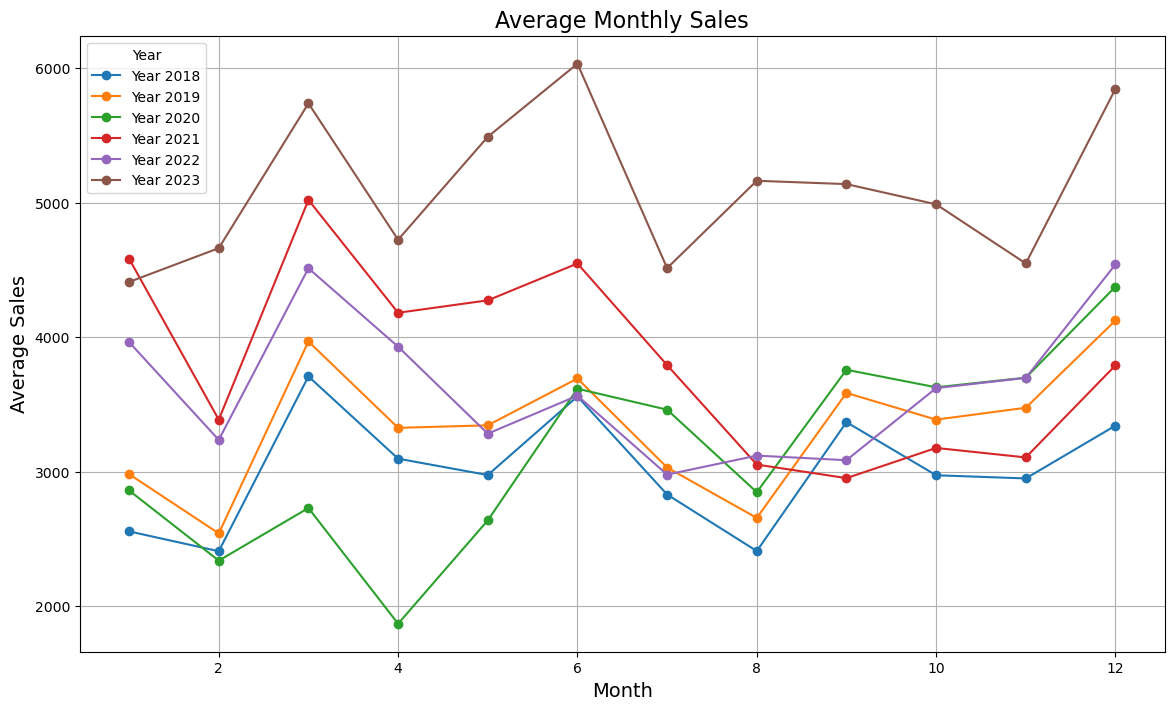

In [11]:
# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each year's data
for year in monthly_avg['Year'].unique():
    yearly_data = monthly_avg[monthly_avg['Year'] == year]
    ax.plot(yearly_data['Month'], yearly_data['Sales'], marker='o', label=f'Year {year}')

# Customize the plot
ax.set_title('Average Monthly Sales', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14)
ax.legend(title='Year')
ax.grid(True)

# Show the plot
plt.show()

In [12]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
yearly_sales.head()

,Year,Sales
0,2018,642254
1,2019,705452
2,2020,661758
3,2021,698693
4,2022,615122


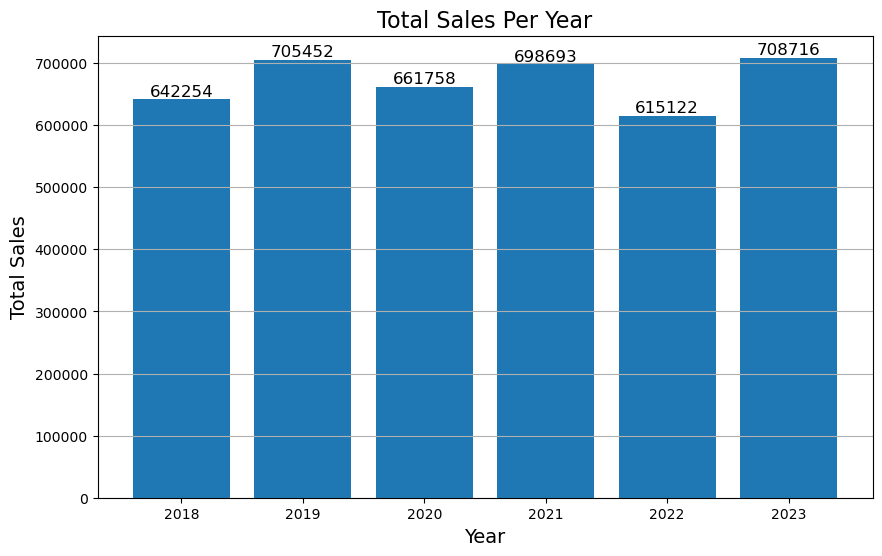

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total sales per year
bars = ax.bar(yearly_sales['Year'], yearly_sales['Sales'])

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Customize the plot
ax.set_title('Total Sales Per Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)
ax.grid(True, axis='y')

# Show the plot
plt.show()

In [14]:
average_sales_per_model = df.groupby('Models')['Sales'].mean().reset_index()

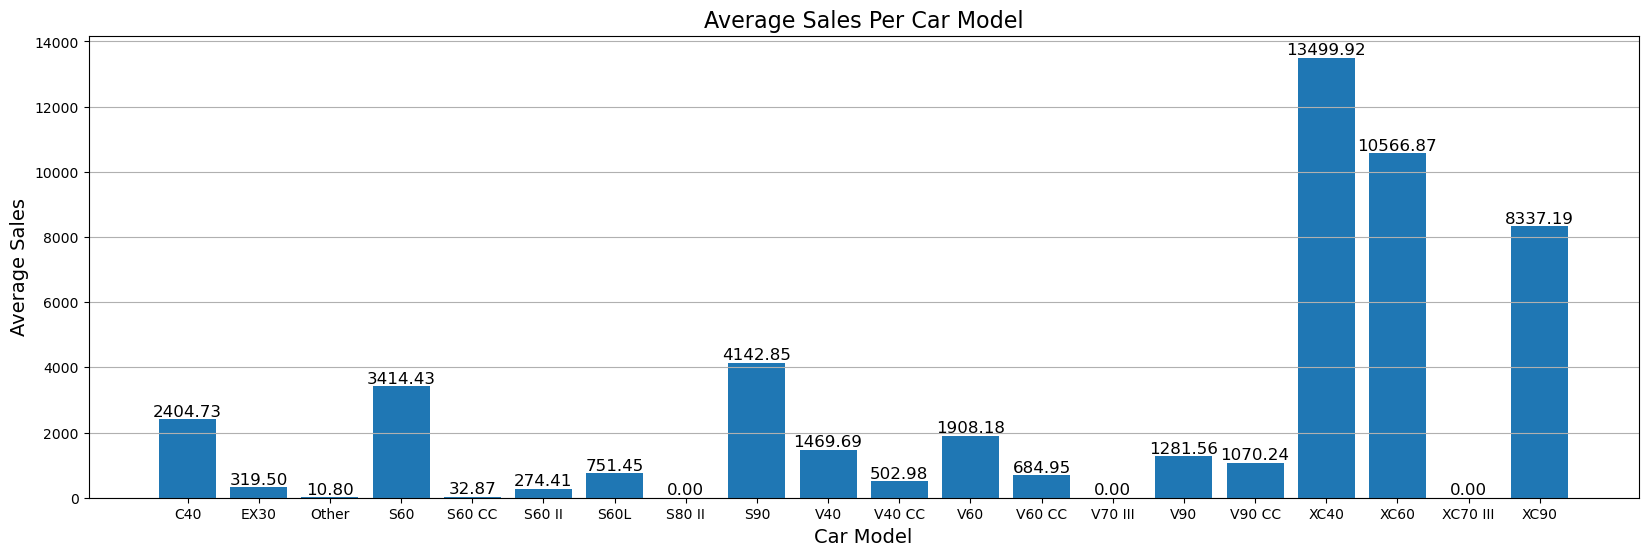

In [49]:
# Create the plot
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the average sales per model
bars = ax.bar(average_sales_per_model['Models'], average_sales_per_model['Sales'])

# Add value annotations on the bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
        height,  # y position (just above the top of the bar)
        f'{height:.2f}',  # text value (formatted to 2 decimal places)
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=12,  # font size
        color='black'  # text color
    )

# Customize the plot
ax.set_title('Average Sales Per Car Model', fontsize=16)
ax.set_xlabel('Car Model', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14)
ax.grid(True, axis='y')

# Show the plot
plt.show()


In [16]:
top_3_models = average_sales_per_model.sort_values(by='Sales', ascending=False).head(3)
top_3_models.head()

,Models,Sales
16,XC40,13499.916667
17,XC60,10566.870690
19,XC90,8337.194444


In [25]:
from sklearn.preprocessing import MinMaxScaler
data=df.groupby('Date')['Sales'].sum().to_frame()
data = data.values
data = data.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

48 24


In [39]:
def reshape_dataset(dataset, lag):
    X=list()
    y=list()

    for i in range(len(dataset)-lag-1):
        a = dataset[i:(i+lag), 0]
        X.append(a)
        y.append(dataset[i + lag, 0])
    return np.array(X), np.array(y)

lag=7
train_X, train_y = reshape_dataset(train, lag)
test_X, test_y = reshape_dataset(test, lag)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(40, 7) (40,) (16, 7) (16,)


In [ ]:
print(train_X.shape, test_X.shape)

(40, 1, 7) (16, 1, 7)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

model = Sequential()
model.add(LSTM(32, return_sequences = True, input_shape=(1, lag)))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2, validation_data=(test_X, test_y))

Epoch 1/100
40/40 - 3s - 76ms/step - loss: 0.2556 - val_loss: 0.1300
Epoch 2/100
40/40 - 0s - 2ms/step - loss: 0.0712 - val_loss: 0.0243
Epoch 3/100
40/40 - 0s - 2ms/step - loss: 0.0495 - val_loss: 0.0239
Epoch 4/100
40/40 - 0s - 2ms/step - loss: 0.0461 - val_loss: 0.0240
Epoch 5/100
40/40 - 0s - 2ms/step - loss: 0.0465 - val_loss: 0.0227
Epoch 6/100
40/40 - 0s - 2ms/step - loss: 0.0443 - val_loss: 0.0237
Epoch 7/100
40/40 - 0s - 2ms/step - loss: 0.0478 - val_loss: 0.0216
Epoch 8/100
40/40 - 0s - 2ms/step - loss: 0.0439 - val_loss: 0.0242
Epoch 9/100
40/40 - 0s - 2ms/step - loss: 0.0424 - val_loss: 0.0231
Epoch 10/100
40/40 - 0s - 2ms/step - loss: 0.0419 - val_loss: 0.0229
Epoch 11/100
40/40 - 0s - 2ms/step - loss: 0.0435 - val_loss: 0.0250
Epoch 12/100
40/40 - 0s - 2ms/step - loss: 0.0389 - val_loss: 0.0201
Epoch 13/100
40/40 - 0s - 2ms/step - loss: 0.0379 - val_loss: 0.0206
Epoch 14/100
40/40 - 0s - 2ms/step - loss: 0.0365 - val_loss: 0.0206
Epoch 15/100
40/40 - 0s - 2ms/step - loss:

In [33]:

model1 = Sequential()
model1.add(GRU(32, return_sequences = True, input_shape=(1, lag)))
model1.add(GRU(32, return_sequences = True))
model1.add(GRU(32))
model1.add(Dense(1, activation = 'linear'))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2, validation_data=(test_X, test_y))

Epoch 1/100
40/40 - 4s - 88ms/step - loss: 0.1297 - val_loss: 0.0251
Epoch 2/100
40/40 - 0s - 2ms/step - loss: 0.0500 - val_loss: 0.0215
Epoch 3/100
40/40 - 0s - 2ms/step - loss: 0.0431 - val_loss: 0.0216
Epoch 4/100
40/40 - 0s - 2ms/step - loss: 0.0481 - val_loss: 0.0211
Epoch 5/100
40/40 - 0s - 2ms/step - loss: 0.0419 - val_loss: 0.0244
Epoch 6/100
40/40 - 0s - 2ms/step - loss: 0.0382 - val_loss: 0.0198
Epoch 7/100
40/40 - 0s - 2ms/step - loss: 0.0408 - val_loss: 0.0221
Epoch 8/100
40/40 - 0s - 2ms/step - loss: 0.0365 - val_loss: 0.0200
Epoch 9/100
40/40 - 0s - 2ms/step - loss: 0.0347 - val_loss: 0.0227
Epoch 10/100
40/40 - 0s - 2ms/step - loss: 0.0361 - val_loss: 0.0240
Epoch 11/100
40/40 - 0s - 2ms/step - loss: 0.0347 - val_loss: 0.0193
Epoch 12/100
40/40 - 0s - 2ms/step - loss: 0.0303 - val_loss: 0.0219
Epoch 13/100
40/40 - 0s - 2ms/step - loss: 0.0314 - val_loss: 0.0329
Epoch 14/100
40/40 - 0s - 2ms/step - loss: 0.0314 - val_loss: 0.0193
Epoch 15/100
40/40 - 0s - 2ms/step - loss:

In [34]:
from sklearn.metrics import mean_squared_error
import math


predict_train = model.predict(train_X)
predict_test = model.predict(test_X)

predict_train = scaler.inverse_transform(predict_train)
train_y = scaler.inverse_transform([train_y])
predict_test = scaler.inverse_transform(predict_test)
test_y = scaler.inverse_transform([test_y])

mse_train = math.sqrt(mean_squared_error(train_y[0], predict_train[:,0]))
print('RMSE on train: %.2f' % (mse_train))
mse_test = math.sqrt(mean_squared_error(test_y[0], predict_test[:,0]))
print('RMSE on test: %.2f' % (mse_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on train: 6877.53
RMSE on test: 6485.33


In [36]:
train_pred = np.empty_like(data)
train_pred[:, :] = np.nan
train_pred[lag:len(predict_train)+lag, :] = predict_train

test_pred = np.empty_like(data)
test_pred[:, :] = np.nan
test_pred[len(predict_train)+(lag*2)+1:len(data)-1, :] = predict_test
# add date column to values 
res=pd.DataFrame(data=list(df.groupby('Date')['Sales'].sum().to_frame()['Sales']))
res['Date']=df.groupby('Date')['Sales'].sum().to_frame().index
res=res.rename(columns={0: 'true_values'})
res['train_predictions']=train_pred # train_pred
res['test_predictions']=test_pred # test_pred

In [37]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.plotly as py
import plotly.graph_objs as go
import colorlover as cl
import cufflinks as cf

c:\Users\abuma\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated and will be removed in a future release



In [38]:
trace_1 = go.Scatter(
   x=res.Date,
   y=res['true_values'],
   name = "Actual sales",
   line = dict(color = '#dd870f'),
   opacity = 1)

trace_2 = go.Scatter(
   x=res.Date[7:train_size-1],
   y=res['train_predictions'][7:train_size-1],
   name = "Train predictions",
   line = dict(color = '#7F7F7F'),
   opacity = 1)


trace_3 = go.Scatter(
   x=res.Date[:],
   y=res['test_predictions'][:],
   name = "Test predictions",
   line = dict(color = '#0b7782'),
   opacity = 1)

data = [trace_1,trace_2, trace_3]

layout = dict(
   title='Sales predictions - LSTM model')


fig = dict(data=data, layout=layout)
iplot(fig)


c:\Users\abuma\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

